In [32]:
import os
import json
import matplotlib.pyplot as plt

x = []
lr_y = []
train_loss_y = []
eval_loss_y = []

def main():
    epoch_num = 10
    batch_num  = 1000

   
    for epoch in range(epoch_num):
        for batch in range(0, batch_num, 10):
            state_file = f'trainer/training_epoch{epoch}/batch{batch}/trainer_state.json'
            if not os.path.exists(state_file): return
            fd = open(state_file, 'r')
            state = json.loads(fd.read())
            lr = state['log_history'][0]['learning_rate']
            train_loss = state['log_history'][0]['loss']
            eval_loss = state['log_history'][1]['eval_loss']

            x.append(f'{epoch}.{batch}')
            lr_y.append(lr)
            train_loss_y.append(train_loss)
            eval_loss_y.append(eval_loss)
            fd.close()
    



main()


            


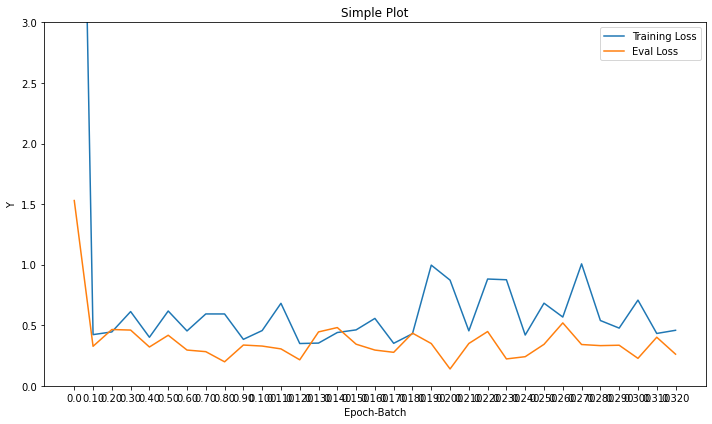

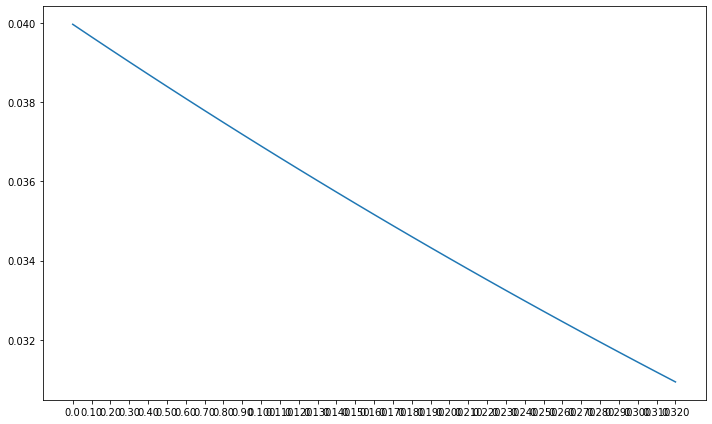

In [33]:
def plot():
    fig, ax = plt.subplots(figsize=(10, 6), layout='tight')
    ax.plot(x, train_loss_y, label="Training Loss")
    ax.plot(x, eval_loss_y, label="Eval Loss")
    ax.set_xlabel('Epoch-Batch')  # Add an x-label to the axes.
    ax.set_ylabel('Y')  # Add a y-label to the axes.
    ax.set_title("Simple Plot")  # Add a title to the axes.
    ax.set_ylim([0.0000, 3.0000])
    ax.legend();  # Add a legend.

    fig, ax1 = plt.subplots(figsize=(10, 6), layout='tight')
    ax1.plot(x, lr_y, label="Learning Rate")

plot()